<a href="https://colab.research.google.com/github/IofchuSasha/Practicheskie/blob/02%2F04/%D1%81%D1%82%D1%83%D0%B4%D0%B5%D0%BD%D1%82%D1%8B%22%D0%9F%D0%A0%D0%9E%D0%90_%D0%9F%D0%A0%D0%90%D0%9A%D0%A2%D0%98%D0%A7%D0%95%D0%A1%D0%9A%D0%90%D0%AF_%D0%A0%D0%90%D0%91%D0%9E%D0%A2%D0%90_4_3_%D0%9E%D0%B1%D1%83%D1%87%D0%B0%D1%8E%D1%89%D0%B8%D0%B5_%D0%BA%D0%B5%D0%B9%D1%81%D1%8B_%D0%BF%D0%BE_%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7%D1%83_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Вариант 22**

In [47]:
#importing the libraries
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#Importing the data from the webpage into a DataFrame
url='https://en.wikipedia.org/wiki/List_of_highest-grossing_superhero_films'
req=requests.get(url)
data=pd.read_html(req.text)
df=data[2]


Изучаем  первые 5 записей: 

In [48]:
df.head()

,Film,Worldwide gross,Year,Superhero(es),Source,Ref
0,Avengers: Endgame,"$2,797,800,564",2019,Avengers,Marvel,[1]
1,Avengers: Infinity War,"$2,048,359,754",2018,Avengers,Marvel,[2]
2,The Avengers,"$1,518,812,988",2012,Avengers,Marvel,[3]
3,Avengers: Age of Ultron,"$1,405,403,694",2015,Avengers,Marvel,[4]
4,Black Panther,"$1,346,913,171",2018,Black Panther,Marvel,[5]


Получение типов данных и пропущенных значений:

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Film             50 non-null     object
 1   Worldwide gross  50 non-null     object
 2   Year             50 non-null     int64 
 3   Superhero(es)    50 non-null     object
 4   Source           50 non-null     object
 5   Ref              50 non-null     object
dtypes: int64(1), object(5)
memory usage: 2.5+ KB


Удалим ненужные строки из столбца **Worldwide gross**, оставив только
числовые значения:

In [54]:
df['Worldwide gross']=df['Worldwide gross'].str.replace(r"$","").str.replace(r",","")

 Первая замена
метод удаляет «US$», а второй метод замены удаляет запятые. Замена
символ с пустой строкой ("") эквивалентен удалению символа. Теперь давайте используем метод **astype** для приведения типа или изменения типа данных этого столбца на **int64**, чтобы этот столбец можно было использовать для вычислений и визуализаций:

In [55]:
df['Worldwide gross']=df['Worldwide gross'].astype('int64')

check:

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Film             50 non-null     object
 1   Worldwide gross  50 non-null     int64 
 2   Year             50 non-null     int64 
 3   Superhero(es)    50 non-null     object
 4   Source           50 non-null     object
 5   Ref              50 non-null     object
dtypes: int64(2), object(4)
memory usage: 2.5+ KB


In [60]:
df['Worldwide gross'].head(5)

0    2797800564
1    2048359754
2    1518812988
3    1405403694
4    1346913171
Name: Worldwide gross, dtype: int64

In [62]:
df

,Film,Worldwide gross,Year,Superhero(es),Source,Ref
0,Avengers: Endgame,2797800564,2019,Avengers,Marvel,[1]
1,Avengers: Infinity War,2048359754,2018,Avengers,Marvel,[2]
2,The Avengers,1518812988,2012,Avengers,Marvel,[3]
3,Avengers: Age of Ultron,1405403694,2015,Avengers,Marvel,[4]
4,Black Panther,1346913171,2018,Black Panther,Marvel,[5]
5,Incredibles 2,1242805359,2018,The Incredibles,Pixar,[6]
6,Iron Man 3,1214811252,2013,Iron Man,Marvel,[7]
7,Captain America: Civil War,1153304495,2016,Captain America,Marvel,[8]
8,Aquaman,1148161807,2018,Aquaman,DC,[9]
9,Spider-Man: Far From Home,1131927996,2019,Spider-Man,Marvel,[10]


In [73]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Film             50 non-null     object
 1   Worldwide gross  50 non-null     int64 
 2   Year             50 non-null     int64 
 3   Superhero(es)    50 non-null     object
 4   Source           50 non-null     object
 5   Ref              50 non-null     object
dtypes: int64(2), object(4)
memory usage: 2.5+ KB


# **Шаг 3: Визуализация**

 сначала мы создаем еще один DataFrame (df1), который содержит подмножество
столбцов, которые содержат исходный DataFrame (df). Этот DataFrame, df1, содержит всего два столбцы - «Фильм» (название фильма) и «Gross» (Выручка). Затем мы сортируем значения выручки в порядке убывания. 

In [74]:
df1=df[['Film','Worldwide gross']].sort_values(ascending=False,by='Worldwide gross')

В этот DataFrame добавляется нежелательный столбец («index»)

In [75]:
#df1.drop(['index'],axis=1,inplace=True)

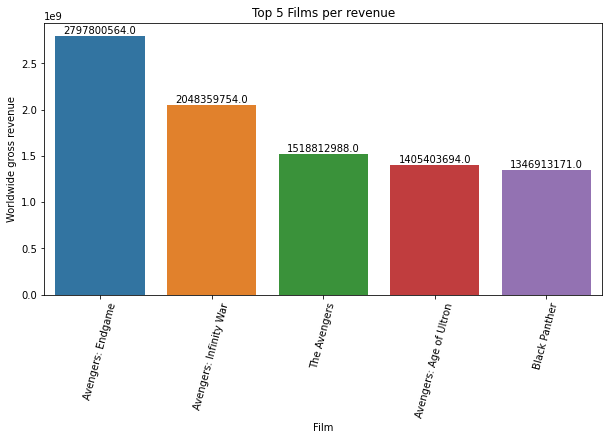

In [76]:
#Plotting the top 5 films by revenue
#setting the figure size
plt.figure(figsize=(10,5))
#creating a bar plot
ax=sns.barplot(x='Film',y='Worldwide gross',data=df1.head(5))
#rotating the x axis labels
ax.set_xticklabels(labels=df1.head()['Film'],rotation=75)
#setting the title
ax.set_title("Top 5 Films per revenue")
#setting the Y-axis labels
ax.set_ylabel("Worldwide gross revenue")
#Labelling the bars in the bar graph
for p in ax.patches:
  ax.annotate(p.get_height(),(p.get_x()+p.get_width()/2,p.get_height()),ha='center',va='bottom')

Чтобы отобразить долю десяти лучших фильмов (по выручке), мы создаем круговую диаграмму.

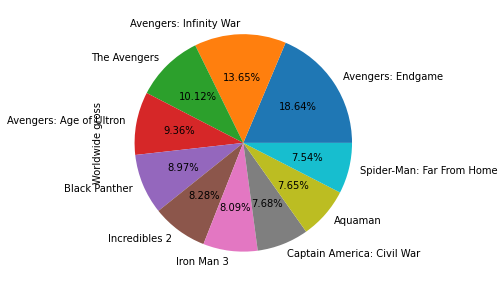

In [77]:
df1['Worldwide gross'].head(10).plot(kind='pie',autopct='%.2f%%',labels=df1['Film'],
figsize=(10,5))

Сначала мы создаем еще один DataFrame, который собирает данные за месяц, вычисляя в среднем за каждый месяц

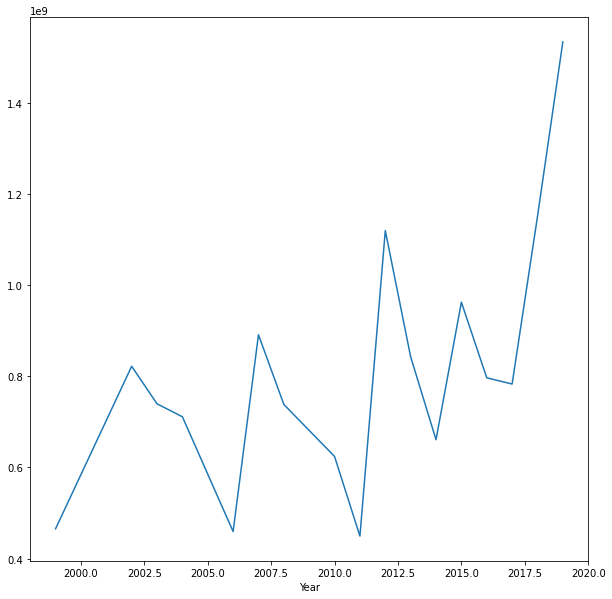

In [72]:
#Aggregating the revenues by month
df2=df.groupby('Year')['Worldwide gross'].mean()
#creating a line plot
df2.plot(kind='line',figsize=(10,10))

Вывод: Самым кассовым фильмом стал "Avengers: Endgame"